In [ ]:
from dotenv import load_dotenv
from langchain_teddynote import logging

# .env 파일 로드
load_dotenv()

# langSmith에 로깅 할 프로젝트 명을 입력
logging.langsmith("LANGCHAIN-CHOON")
# logging.langsmith("LANGCHAIN-CHOON", set_enable=False)      # LangSmith 추적 비활성화

### 1. ChatOpenAI API 호출

간단한게 ChatOpenAI API를 호출해보고 리턴 된 객체에서 내가 보고 싶은 객체의 데이터만 조회

In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(temperature=0.1, model_name="gpt-4o")

question = "서울을 구성하는 구들을 애기해줘"

response = llm.invoke(question)
response

In [ ]:
response.content

In [ ]:
response.response_metadata["token_usage"]

## 2. Stream 호출

실시간 형태로 답변 받아서 출력

In [ ]:
stream_answer = llm.stream(question)
final_answer = ""

# 스트리밍 된 데이터를 다른 문자열에 저장하고자 한다면 아래의 final_answer 변수를 확인
for token in stream_answer:
    print(token.content, end="", flush=True)
    final_answer += token.content

# final_answer

## 3. 멀티모달 (이미지 인식)

멀티모달은 텍스트뿐만이 아니라 이미지, 오디오, 비디오 같은 형태도 같이 처리할 수 있는것을 애기한다 

In [22]:
from langchain_teddynote.models import MultiModal


llm = ChatOpenAI(temperature=0.1, model_name="gpt-4o")

multimodal_llm = MultiModal(llm)

In [ ]:
# 이미지가 고해상도면 더 좋은 결과를 얻어 낼 수 있다
# 샘플 이미지 주소(웹사이트로 부터 바로 인식)
IMAGE_URL = "https://t3.ftcdn.net/jpg/03/77/33/96/360_F_377339633_Rtv9I77sSmSNcev8bEcnVxTHrXB4nRJ5.jpg"

print(multimodal_llm.invoke(IMAGE_URL))


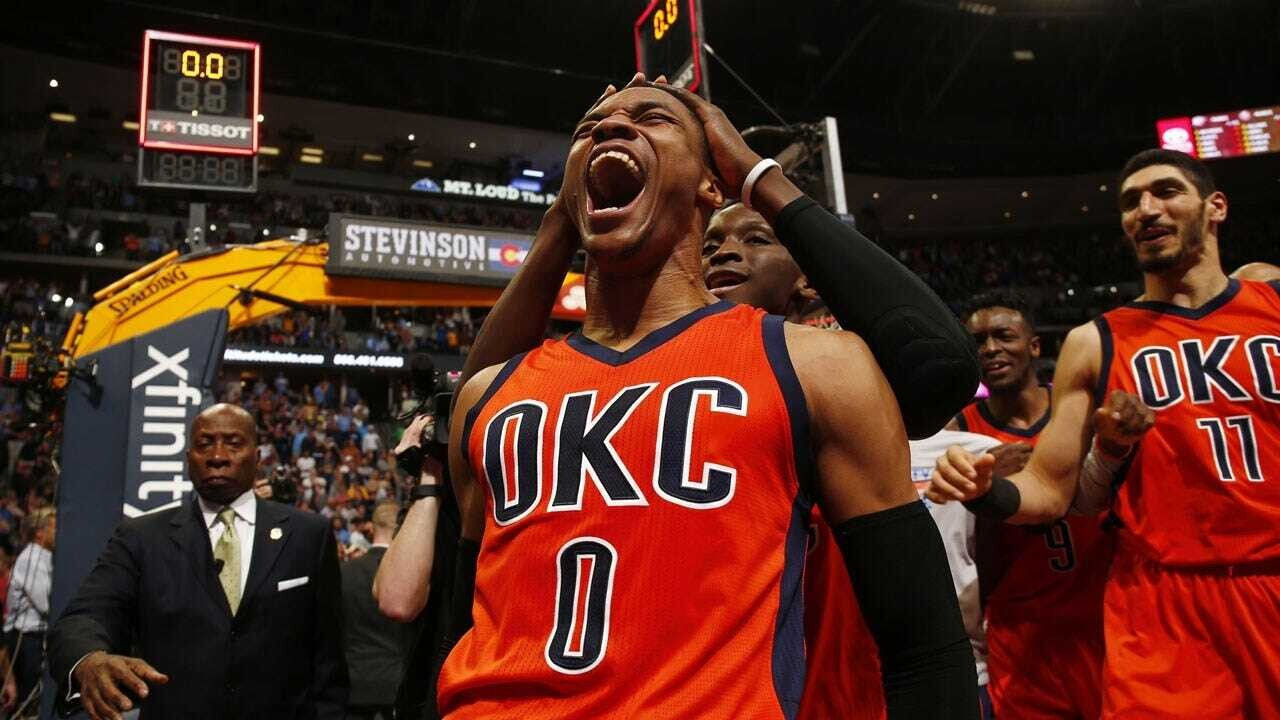

The image captures an intense and emotional moment during a basketball game. The central figure is a player wearing an orange jersey with "OKC" and the number "0" on it, indicating he is part of the Oklahoma City Thunder team. His expression is one of exhilaration, possibly celebrating a significant achievement or victory. 

Surrounding him are teammates, also in orange jerseys, who appear to be congratulating or celebrating with him. One teammate is placing his hands on the central player's head, which is a common gesture of camaraderie and excitement in sports.

In the background, a scoreboard shows "0.0," suggesting the game has just ended. The crowd is visible, adding to the atmosphere of excitement and celebration. The presence of a security or staff member in a suit indicates the formal setting of a professional sports event. 

Overall, the image conveys a moment of triumph and team spirit in a competitive sports environment.

In [25]:
# 로컬에 저장되어 있는 이미지 파일 분석 요청
IMAGE_URL = "./images/test.jpg"

stream_answer = multimodal_llm.stream(IMAGE_URL)
for token in stream_answer:
    print(token.content, end="", flush=True)

## 4. System, User 프롬프트 수정

좀 더 정확한 분석의 결과를 LLM에게 얻기 위해 System, User 프롬프트에 해당하는 내용을 정의할 수 있다
- System 프롬프트는 요청하고자 하는 데이터의 분석가임을 주입하는 프롬프트를 작성
  (ex: 당신은 주식 전문가 입니다. 당신은 NFL 분석 전문가입니다 등등)
- User 프롬프트는 내가 LLM에게 요청하고자 하는 질의에 대해 좀 더 구체적인 요구사항을 작성
  (ex: 현재 이 기업의 자산 위주로 설명해줘. 이 선수의 공격 지수와 관련 된 것 위주로 설명해줘, 이 내용을 한글로 번역해서 알려줘 등등)

In [28]:
# 로컬에 저장되어 있는 이미지 파일 분석 요청
IMAGE_URL = "./images/test.jpg"

system_prompt = "스포츠 전문가의 입장으로서 의견을 전달 해줘"
user_prompt = "분석한 결과에 대해서는 한글로 번역해서 알려줘"


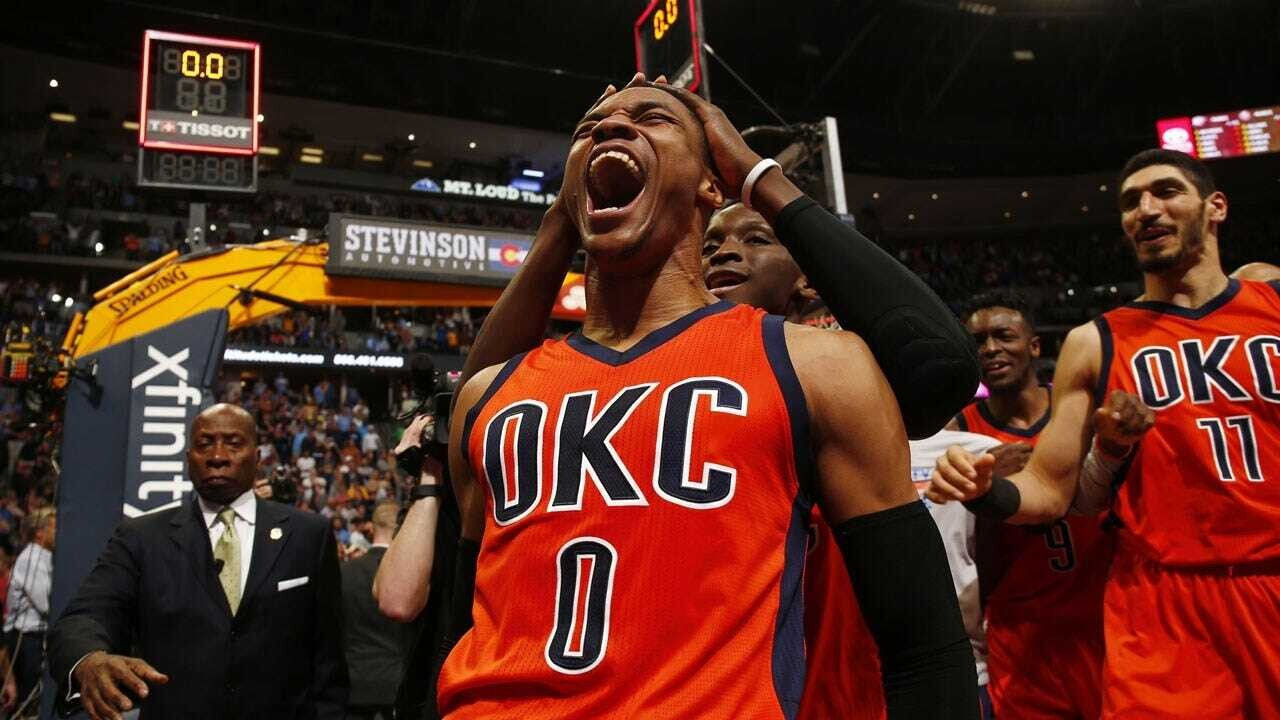

이 이미지는 농구 경기 후 OKC 팀의 선수들이 기뻐하는 장면을 보여줍니다. 선수들은 승리의 순간을 즐기며 서로를 축하하고 있습니다. 경기장의 전광판에는 시간이 0.0으로 표시되어 있어 경기가 막 끝났음을 알 수 있습니다. 선수들의 표정과 몸짓에서 승리의 기쁨과 팀워크의 중요성을 느낄 수 있습니다.

In [29]:
stream_answer = multimodal_llm.stream(IMAGE_URL, system_prompt, user_prompt)
for token in stream_answer:
    print(token.content, end="", flush=True)